### 1. LOADING FILES

In [1]:
import pickle 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [3]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,f1_score,confusion_matrix

In [111]:
lista_modelos=['DTC','RND','BAG','ADA','GBCT','LOGREG','KNN']

In [4]:
train=pd.read_csv('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\df_train.csv',sep=',')
test=pd.read_csv('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\df_test.csv',sep=',')
X_test=test[['Código Distrito Centro','Age_range_code','Nationality_code','Sex_code','year']]
X_train=train[['Código Distrito Centro','Age_range_code','Nationality_code','Sex_code','year']]
y_test=test['Código Tipo Supuesto Urgente']
y_train=train['Código Tipo Supuesto Urgente']

In [6]:
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(9477, 5)
(28429, 5)
(9477,)
(28429,)


In [101]:
def load_files(file):
    '''
    Cargar modelos con formato binario en un notebook o fichero python
    '''
    os.chdir('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\model')
    model = pickle.load( open( file, "rb" ) )


Aqui vamos a cargar los modelos para pasar los test

In [ ]:
load_files('ADA220905115548.pickle')

In [50]:
load_files('BAG220901161323.pickle','BAG')

In [ ]:
load_files('DTC220831182313.pickle','DTC')

In [40]:
load_files('GBCT220901161340.pickle','GBCT')

In [41]:
load_files('KNN220905121219.pickle','KNN')

In [47]:
load_files('LOGREG220901170800.pickle','LOGREG')

In [ ]:
load_files('RND220901161312.pickle')


In [ ]:
LOGREG

In [5]:
os.chdir('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\model')
ADA = pickle.load( open( 'ADA220905115548.pickle', "rb" ) )

In [6]:
os.chdir('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\model')
BAG = pickle.load( open( 'BAG220901161323.pickle', "rb" ) )

In [7]:
os.chdir('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\model')
DTC = pickle.load( open( 'DTC220831182313.pickle', "rb" ) )

In [8]:
os.chdir('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\model')
GBCT = pickle.load( open( 'GBCT220901161340.pickle', "rb" ) )

In [9]:
GBCT

GradientBoostingClassifier(random_state=20)

In [10]:
os.chdir('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\model')
KNN = pickle.load( open('KNN220905121219.pickle', "rb" ) )

In [11]:
os.chdir('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\model')
LOGREG = pickle.load( open( 'LOGREG220901170800.pickle', "rb" ) )

In [12]:
os.chdir('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\model')
RND = pickle.load( open( 'RND220901161312.pickle', "rb" ) )

In [16]:
RND

RandomForestClassifier(random_state=20)

### 2. CALCULATING ERROR IN EACH MODEL

In [13]:
def error_modelo(model, X_test, y_test):
    '''
    Dejamos grabada cada uno de los parámetros de cada modelo y hacemos su representación
    '''
    y_pred = model.predict(X_test)
    f1_model=f1_score(y_test, y_pred,average='micro')
#    acc_model=accuracy_score(y_test, y_pred)
    precision_model=precision_score(y_test, y_pred,average='micro')
    recall_model=recall_score(y_test, y_pred,average='micro')
#    roc_auc_model=roc_auc_score(y_test, model.predict_proba(X_test),multi_class='ovr')
    conf_model=confusion_matrix(y_test, y_pred, normalize='true')
#    print('Accuracy', acc_model)
    print('F1', f1_model)
    print('Precision', precision_model)
    print('Recall', recall_model)
    print('-'*30)
#    print('ROC', roc_auc_model)

    plt.figure(figsize=(10,10))
    sns.heatmap(conf_model, annot=True)
    return precision_model, recall_model

def errores_modelos(lista_modelos:list): 
    '''
    Usamos una lista de los modelos entrenados para sacar sus metricas juntas y poder hacer asi una evaluación completa de todas
    '''            
    for model in lista_modelos:
        error_modelo(model) 


**ADA BOOST**

F1 0.7500263796560094
Precision 0.7500263796560093
Recall 0.7500263796560093
------------------------------


(0.7500263796560093, 0.7500263796560093)

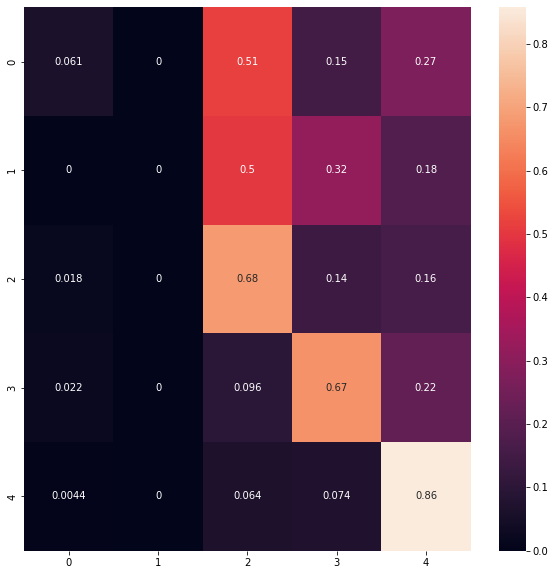

In [14]:
error_modelo(ADA, X_test, y_test)   

F1 0.7717632162076606
Precision 0.7717632162076606
Recall 0.7717632162076606
------------------------------


(0.7717632162076606, 0.7717632162076606)

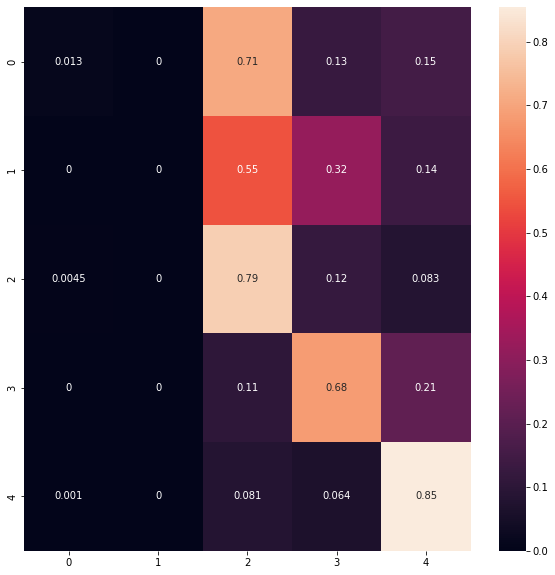

In [36]:
seed= 20
estimator = DecisionTreeClassifier(max_depth=7,random_state=seed)
ADA_3=AdaBoostClassifier(base_estimator = estimator,n_estimators=50,
                             random_state=seed,learning_rate=0.01)
ADA_3.fit(X_train, y_train)
error_modelo (ADA_3, X_test, y_test)

Se observa  que **no** se consigue un mejor f1-score manipulando manualmente los hiperparámetros del módelo.

**BAG**

F1 0.7740846259364779
Precision 0.7740846259364778
Recall 0.7740846259364778
------------------------------


(0.7740846259364778, 0.7740846259364778)

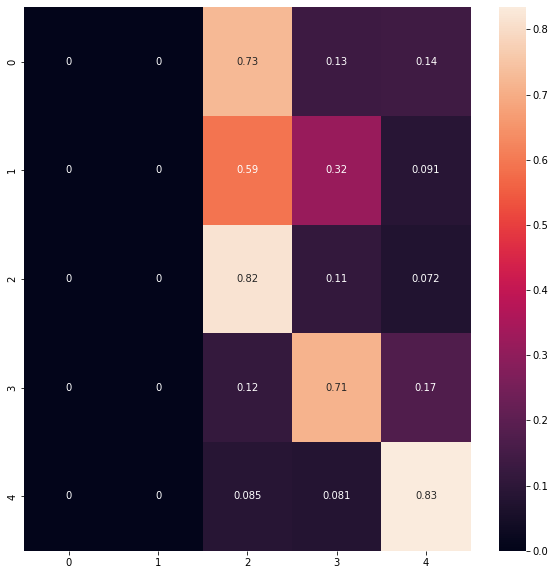

In [75]:
seed= 20
estimator = DecisionTreeClassifier(max_depth=9,random_state=seed)
BAG_3=BaggingClassifier(base_estimator = estimator,random_state=seed,max_features=5,n_estimators=500,max_samples=500)
#        AdaBoostClassifier(base_estimator = estimator,n_estimators=100,
#                             random_state=seed,learning_rate=0.01)
BAG_3.fit(X_train, y_train)
error_modelo (BAG_3, X_test, y_test)

F1 0.7728184024480321
Precision 0.7728184024480321
Recall 0.7728184024480321
------------------------------


(0.7728184024480321, 0.7728184024480321)

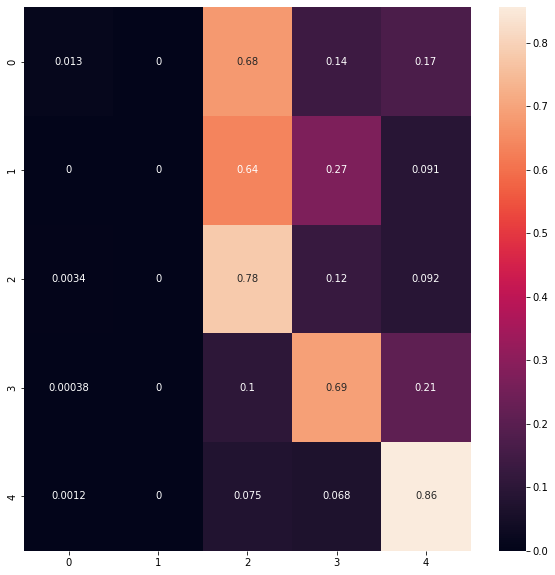

In [19]:
error_modelo(BAG, X_test, y_test)

Se observa  que **apenas mejora**  f1-score manipulando manualmente los hiperparámetros del módelo.

**DTC**

F1 0.7725018465759207
Precision 0.7725018465759207
Recall 0.7725018465759207
------------------------------


(0.7725018465759207, 0.7725018465759207)

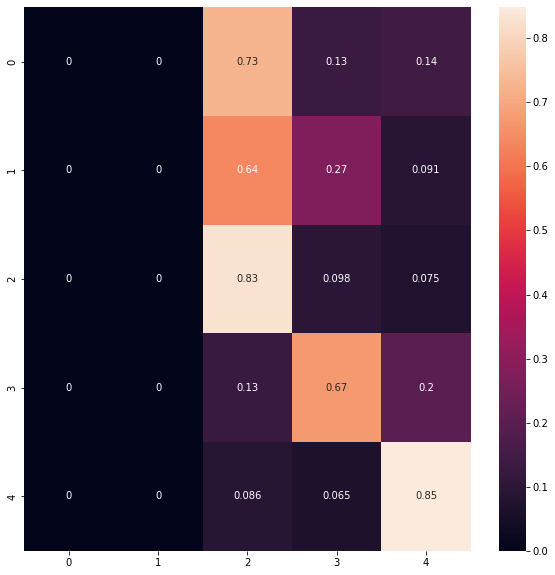

In [101]:
seed= 20
DTC_3=DecisionTreeClassifier(random_state=seed,max_depth=7,min_samples_leaf =100)

DTC_3.fit(X_train, y_train)
error_modelo (DTC_3, X_test, y_test)

Se observa  que **apenas mejora**  f1-score manipulando manualmente los hiperparámetros del módelo.

F1 0.7684921388625092
Precision 0.7684921388625092
Recall 0.7684921388625092
------------------------------


(0.7684921388625092, 0.7684921388625092)

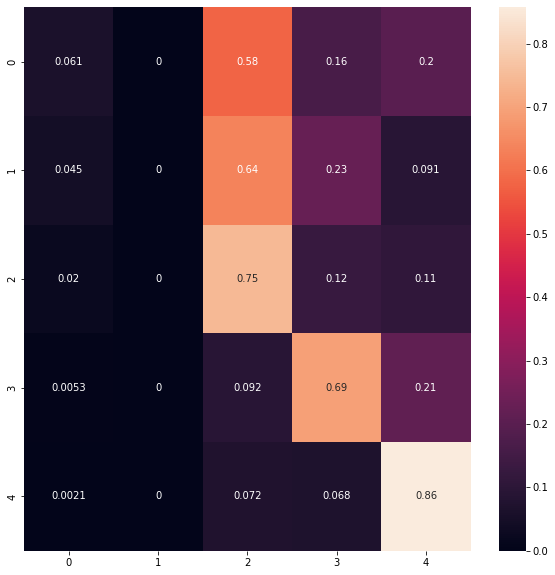

In [21]:
error_modelo(DTC, X_test, y_test)

**RND**

F1 0.7732404769441806
Precision 0.7732404769441806
Recall 0.7732404769441806
------------------------------


(0.7732404769441806, 0.7732404769441806)

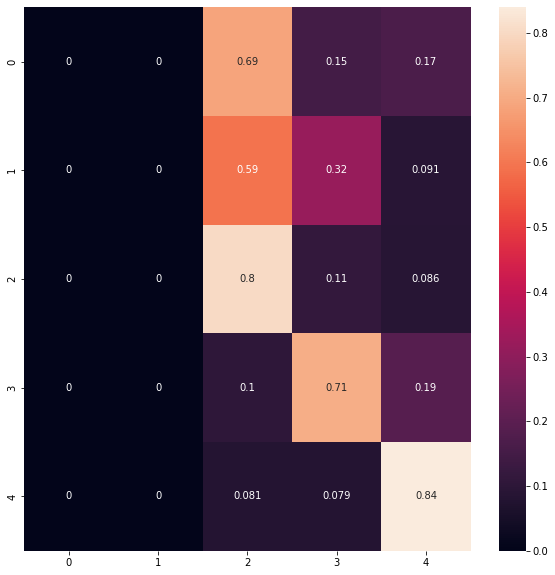

In [127]:
seed= 20

RND_3=RandomForestClassifier(random_state=seed,n_estimators=500,criterion='entropy',max_samples=500,max_depth =15)

RND_3.fit(X_train, y_train)
error_modelo (RND_3, X_test, y_test)

F1 0.7677535084942493
Precision 0.7677535084942493
Recall 0.7677535084942493
------------------------------


(0.7677535084942493, 0.7677535084942493)

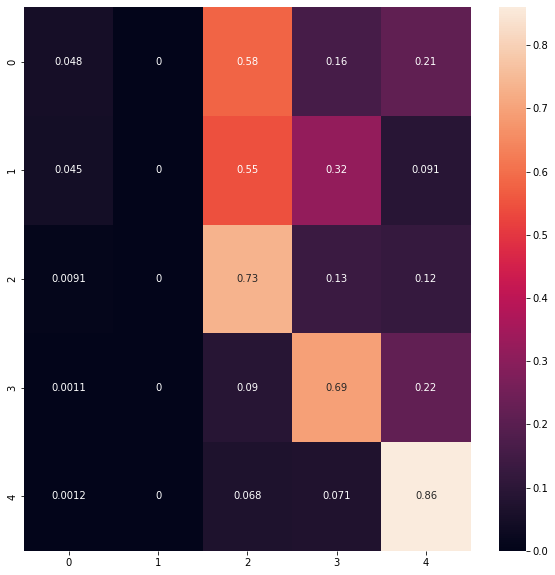

In [22]:
error_modelo(RND, X_test, y_test)

Se observa  que **apenas mejora**  f1-score manipulando manualmente los hiperparámetros del módelo.

**GBCT**

F1 0.7752453308008863
Precision 0.7752453308008863
Recall 0.7752453308008863
------------------------------


(0.7752453308008863, 0.7752453308008863)

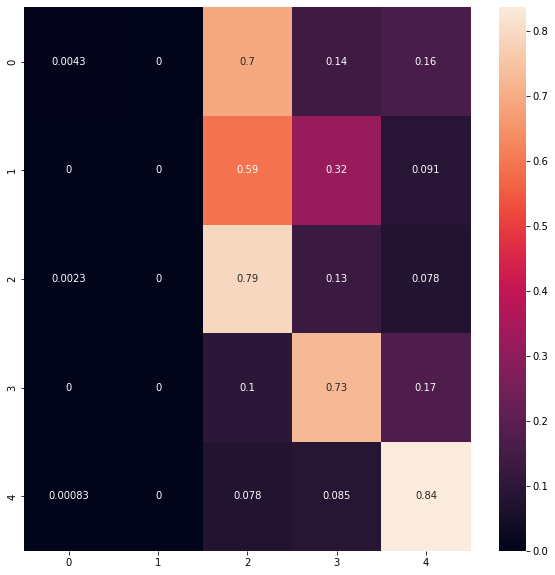

In [152]:
seed= 20

GBCT_3=GradientBoostingClassifier(n_estimators=500,random_state=seed,subsample =0.75,min_samples_leaf =100)

GBCT_3.fit(X_train, y_train)
error_modelo (GBCT_3, X_test, y_test)

F1 0.7737680700643663
Precision 0.7737680700643663
Recall 0.7737680700643663
------------------------------


(0.7737680700643663, 0.7737680700643663)

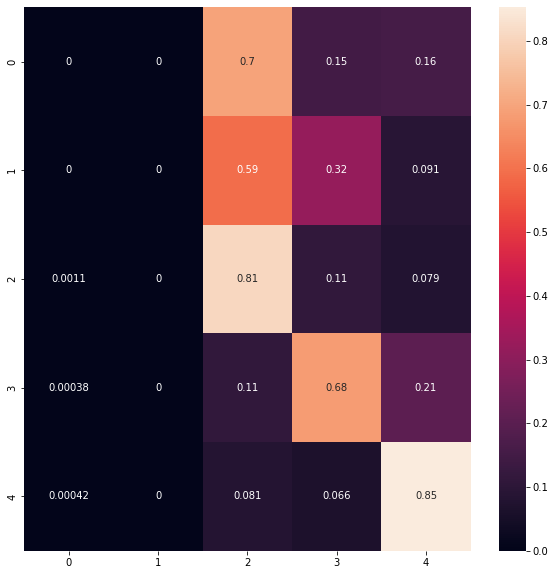

In [23]:
error_modelo(GBCT, X_test, y_test)

In [153]:
pickle.dump(GBCT_3,open('my_model','wb'))